In [1]:
from __future__ import print_function
from keras.models import Sequential, Model
from keras.layers import Input, Reshape, Dense, Dropout, MaxPooling2D, Conv2D, Flatten
from keras.layers import Conv2DTranspose, LeakyReLU
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras import backend as K
from keras import initializers
import tensorflow as tf
import numpy as np
from tqdm import tqdm
import cv2
import math

from keras.datasets import mnist

import os

from keras.utils.vis_utils import plot_model
from keras.utils.generic_utils import Progbar

import matplotlib.pyplot as plt
from keras.models import load_model
#from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
def load_mnist_data():
    """ load mnist data """
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    #X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    #X_test = (X_test.astype(np.float32) - 127.5) / 127.5
    X_train = X_train.astype(np.float32) / 255.#20200507
    X_test = X_test.astype(np.float32) / 255. #20200507

    X_train = X_train[:,:,:,None]
    X_test = X_test[:,:,:,None]

    X_test_original = X_test.copy()

    #X_train = X_train[Y_train==0]
    #X_test = X_test[Y_test==0]
    
    #y_train = to_categorical(y_train)
    #y_test = to_categorical(y_test)
    
    print('train shape: ', X_train.shape)
    print('X_test_original shape: ', X_test_original.shape)
    print('y_train shape: ', y_train.shape)

    return X_train, X_test, X_test_original, y_train, y_test

In [3]:
""" build discriminator model """
def discriminator_model(img_size, channels):
    inputs = Input((img_size, img_size, channels))

    conv1 = Conv2D(64, (5,5), padding='same')(inputs)
    conv1 = LeakyReLU(0.2)(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

    conv2 = Conv2D(128, (5,5), padding='same')(pool1)
    conv2 = LeakyReLU(0.2)(conv2)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

    fc1 = Flatten()(pool2)
    fc1 = Dense(1)(fc1)
    outputs = Activation('sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()

    return model

In [5]:
X_train, X_test, X_test_original,y_train, y_test = load_mnist_data()

train shape:  (60000, 28, 28, 1)
X_test_original shape:  (10000, 28, 28, 1)
y_train shape:  (60000,)


In [6]:
ruined = X_train[:1000].copy()
normal = X_train[1000:2000].copy()

In [7]:
ruined[:,3,5:15] = 1
ruined[:,1:10,5:10] = 1

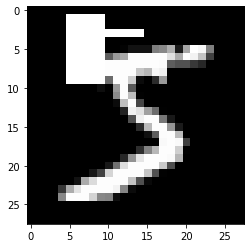

In [8]:
plt.imshow(ruined[0].reshape((28,28)), cmap='gray')

In [10]:
dmodel = discriminator_model(28, 1)
dmodel.load_weights('./saved_model/discriminator.h5')
predicted_normal = dmodel.predict(normal)
predicted_ruined = dmodel.predict(ruined)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0   

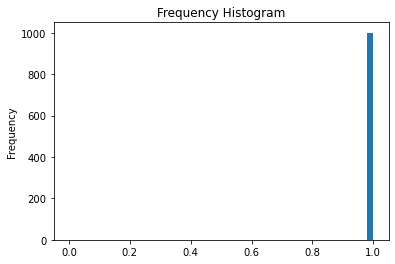

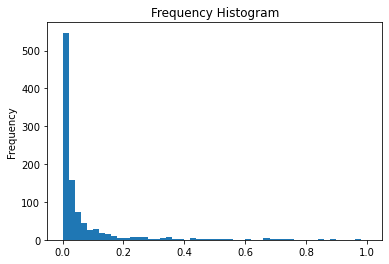

In [11]:
import matplotlib.pyplot as plt

plt.hist(predicted_normal, bins=50, range=(0,1))
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
plt.show()

plt.hist(predicted_ruined, bins=50, range=(0,1))
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [12]:
print(predicted_normal[:10])

[[1.        ]
 [1.        ]
 [0.99999964]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]]
